 # Classification and Regression Trees

In [119]:
from CART import DecisionTree
from sklearn.datasets import load_digits, load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [140]:
RANDOM_STATE = 17

digits = load_digits()

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [122]:
tree = DecisionTree(max_depth = 2, criterion='gini', debug=True)
tree.fit(X_train, y_train)

print(accuracy_score(tree.predict(X_test), y_test))


DecisionTree params:
max_depth = 2, min_samples_split = 2, criterion = gini

Best split: Node criterion: 36 < 1.0 gives information gain of 0.0656258638816174 at depth 0
Best split: Node criterion: 42 < 6.0 gives information gain of 0.27042163464570934 at depth 1
Best split: Node criterion: 21 < 1.0 gives information gain of 0.06609118606251563 at depth 1
0.2972222222222222


In [123]:
tree.print_tree()

Node criterion: 36 < 1.0
--> True:
  Node criterion: 42 < 6.0
  --> True:
    Predict:  {2: 0.017241379310344827, 5: 0.25862068965517243, 9: 0.7241379310344828}
  --> False:
    Predict:  {0: 0.89171974522293, 2: 0.006369426751592357, 4: 0.025477707006369428, 5: 0.03184713375796178, 6: 0.025477707006369428, 8: 0.01910828025477707}
--> False:
  Node criterion: 21 < 1.0
  --> True:
    Predict:  {1: 0.0938337801608579, 2: 0.10455764075067024, 3: 0.021447721179624665, 4: 0.07238605898123325, 5: 0.3002680965147453, 6: 0.38337801608579086, 7: 0.0160857908847185, 8: 0.00804289544235925}
  --> False:
    Predict:  {0: 0.004711425206124852, 1: 0.1330977620730271, 2: 0.12014134275618374, 3: 0.16136631330977622, 4: 0.12956419316843346, 5: 0.01060070671378092, 6: 0.002355712603062426, 7: 0.16725559481743227, 8: 0.15547703180212014, 9: 0.1154299175500589}


In [124]:
tree2 = DecisionTree(max_depth = 2, criterion='entropy', debug=True)
tree2.fit(X_train, y_train)

print(accuracy_score(tree2.predict(X_test), y_test))


DecisionTree params:
max_depth = 2, min_samples_split = 2, criterion = entropy

Best split: Node criterion: 21 < 2.0 gives information gain of 0.4717055045592944 at depth 0
Best split: Node criterion: 42 < 9.0 gives information gain of 0.6115662926188997 at depth 1
Best split: Node criterion: 36 < 4.0 gives information gain of 0.5246450296047049 at depth 1
0.3611111111111111


In [125]:
tree2.print_tree()

Node criterion: 21 < 2.0
--> True:
  Node criterion: 42 < 9.0
  --> True:
    Predict:  {1: 0.1559633027522936, 2: 0.15137614678899083, 3: 0.045871559633027525, 4: 0.045871559633027525, 5: 0.5504587155963303, 6: 0.013761467889908258, 7: 0.022935779816513763, 8: 0.013761467889908258}
  --> False:
    Predict:  {0: 0.004975124378109453, 1: 0.03482587064676617, 2: 0.06467661691542288, 4: 0.13930348258706468, 5: 0.03482587064676617, 6: 0.7164179104477612, 7: 0.004975124378109453}
--> False:
  Node criterion: 36 < 4.0
  --> True:
    Predict:  {0: 0.5860655737704918, 1: 0.00819672131147541, 2: 0.02459016393442623, 3: 0.01639344262295082, 4: 0.004098360655737705, 5: 0.040983606557377046, 6: 0.004098360655737705, 8: 0.028688524590163935, 9: 0.28688524590163933}
  --> False:
    Predict:  {1: 0.13565891472868216, 2: 0.11757105943152454, 3: 0.16925064599483206, 4: 0.13178294573643412, 5: 0.00516795865633075, 6: 0.0012919896640826874, 7: 0.1834625322997416, 8: 0.165374677002584, 9: 0.09043927648

In [105]:
%%time

tree_params = {'max_depth': list(range(3,11)),
             'criterion': ['entropy', 'gini']}
    
clf = GridSearchCV(DecisionTree(), tree_params, cv=5, scoring='accuracy',
                  verbose=True, n_jobs=-1)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.1min finished


Wall time: 1min 7s


In [106]:
clf.best_score_, clf.best_params_ 

(0.860125260960334, {'criterion': 'entropy', 'max_depth': 8})

## Compare performance with the decision tree implementation from sklear.

In [126]:
%%time 

mytree = DecisionTree(criterion='entropy', max_depth=8)
mytree.fit(X_train, y_train)

Wall time: 2.73 s


In [127]:
print(accuracy_score(mytree.predict(X_test), y_test))

0.8916666666666667


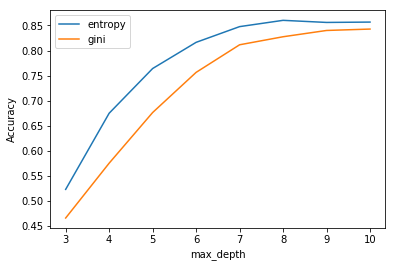

In [128]:
scores = np.array(clf.cv_results_['mean_test_score'])
scores = scores.reshape(len(tree_params['criterion']), 
                        len(tree_params['max_depth']))

for ind, i in enumerate(tree_params['criterion']):
    plt.plot(tree_params['max_depth'], scores[ind], label=str(i))
plt.legend(loc='best')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show();

# Regression

Download the dataset boston using the method load_boston. Split the data into train and test with the train_test_split method, use parameter values test_size=0.2, random_state=17. Try to train shallow regression decision trees and make sure that variance and mad_median criteria return different results.

In [117]:
boston = load_boston()

X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [120]:
reg_tree1 = DecisionTree(max_depth=2, criterion='variance', debug=True)
reg_tree1.fit(X_train, y_train)

print(mean_squared_error(reg_tree1.predict(X_test),y_test))


DecisionTree params:
max_depth = 2, min_samples_split = 2, criterion = variance

Best split: Node criterion: 12 < 7.51 gives information gain of 41.768122026649124 at depth 0
Best split: Node criterion: 5 < 7.454 gives information gain of 46.87549450247771 at depth 1
Best split: Node criterion: 12 < 15.02 gives information gain of 13.469312709393131 at depth 1
32.25666027354226


In [129]:
reg_tree2 = DecisionTree(max_depth=2, criterion='mad_median', debug=True)
reg_tree2.fit(X_train, y_train)

print(mean_squared_error(reg_tree2.predict(X_test),y_test))


DecisionTree params:
max_depth = 2, min_samples_split = 2, criterion = mad_median

Best split: Node criterion: 52 < 8.0 gives information gain of 0.3194154488517742 at depth 0
Best split: Node criterion: 29 < 13.0 gives information gain of 0.2575757575757578 at depth 1
Best split: Node criterion: 36 < 1.0 gives information gain of 0.34213421342134165 at depth 1
6.405756076284107


In [131]:
%%time

tree_params = {'criterion': ['variance', 'mad_median'],
              'max_depth': list(range(2,9))}

reg = GridSearchCV(DecisionTree(), tree_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

reg.fit(X_train, y_train)

C:\Users\sepolt\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Wall time: 40.7 s


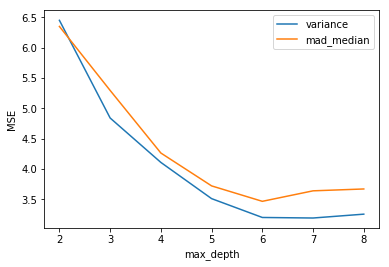

In [132]:
scores = -np.array(reg.cv_results_['mean_test_score'])
scores = scores.reshape(len(tree_params['criterion']), len(tree_params['max_depth']))

for ind, i in enumerate(tree_params['criterion']):
    plt.plot(tree_params['max_depth'], scores[ind], label=str(i))
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.show();

In [133]:
reg.best_score_, reg.best_params_

(-3.1923370032356244, {'criterion': 'variance', 'max_depth': 7})

In [134]:
reg_tree_best = DecisionTree(max_depth=7, criterion='variance')
reg_tree_best.fit(X_train, y_train)

print(mean_squared_error(reg_tree_best.predict(X_test),y_test))

3.186542040121014
